
## References
* https://scikit-learn.org/stable/modules/tree.html#tree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html


## python packages



* pydotplus 
* graphviz
* seaborn


In [1]:
import graphviz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from pydotplus import graph_from_dot_data

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz # decision tree


# 1. Decision Tree model & Visualization 이해하기

In [2]:
# train data example
#    x1 x2  
X = [[0, 0], 
     [4, 4]]
y = ['A', 'B']

# 1. create decision tree model
tree_clf = DecisionTreeClassifier(random_state=4)

# 2. train model
tree_clf = tree_clf.fit(X, y)

# test data example
#         x1  x2  
X_test = [[4, 3]]
y_test = ['B']

# 3. predict y
print("prediction  : ", tree_clf.predict(X_test))
print("ground truth: ", y_test)

prediction  :  ['B']
ground truth:  ['B']


- 시각화 방법 (1)

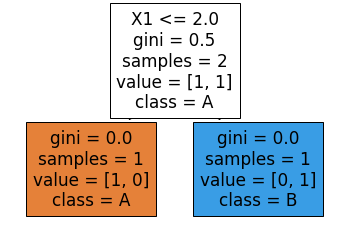

In [3]:
# 4. plot tree (1)
plot_tree(tree_clf, filled=True, feature_names = ['X1', 'X2'], class_names = ['A','B'])
plt.show()

- 시각화 방법 (2)

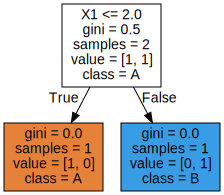

In [4]:
# 4. plot tree (2)

dot_data = export_graphviz(tree_clf, filled=True, out_file=None,
                           feature_names = ["X1", "X2"], class_names=['A','B'],
                           rounded=False)
graphviz.Source(dot_data)

# 출력결과 저장 및 출력
# graph = graph_from_dot_data(dot_data)
# graph.write_png('./simple_tree.png')
# Image('./simple_tree.png')

<br>

# 2. Iris 데이터를 이용한 Decision Tree Modeling


In [5]:
from sklearn.datasets import load_iris # dataset

iris = load_iris() # iris dataset

tree_clf_iris = DecisionTreeClassifier(random_state=4, criterion='entropy') # decision tree model 생성
tree_clf_iris = tree_clf_iris.fit(iris.data, iris.target) # model 학습

In [6]:
ex_X, ex_y = load_iris(return_X_y=True)
ex_X.shape

(150, 4)

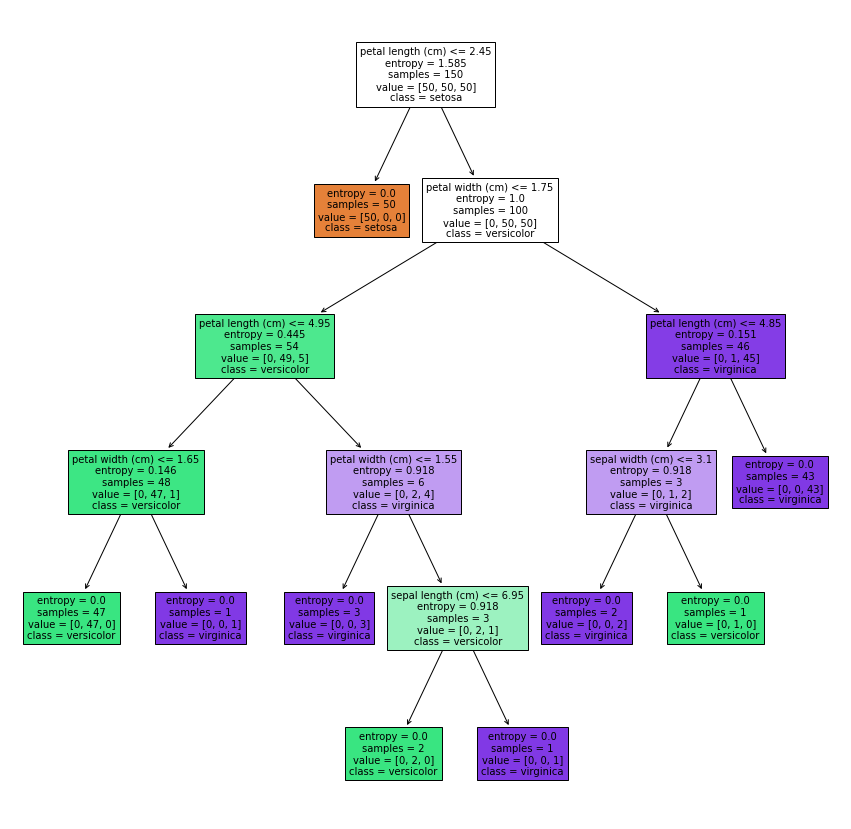

In [7]:
# 시각화 방법 (1)
plt.figure(figsize=(15,15))
plot_tree(tree_clf_iris, filled=True, fontsize=10, 
          feature_names = iris.feature_names,  # 변수명 지정
          class_names = iris.target_names) # target label 지정
plt.show()

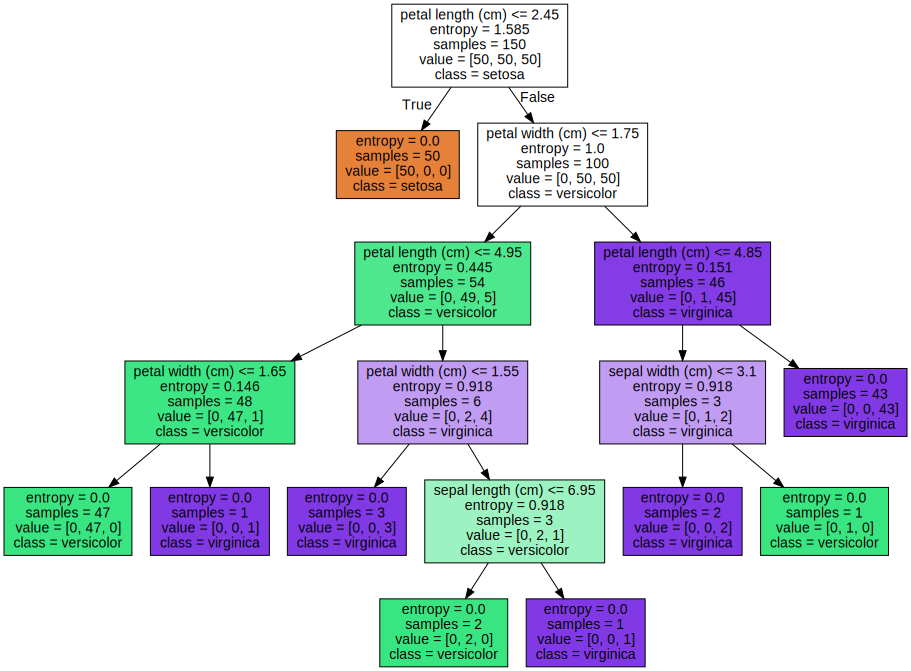

In [8]:
# 시각화 방법 (2)

dot_data = export_graphviz(tree_clf_iris, filled=True, out_file=None,
                           feature_names = iris.feature_names,
                           class_names = iris.target_names,
                           rounded=False)
graphviz.Source(dot_data)

# 출력결과 저장 및 출력
# graph = graph_from_dot_data(dot_data)
# graph.write_png('./tree_iris.png')
# Image('./tree_iris.png')


# 3. Pruning (가지치기)


- 깊이 제한

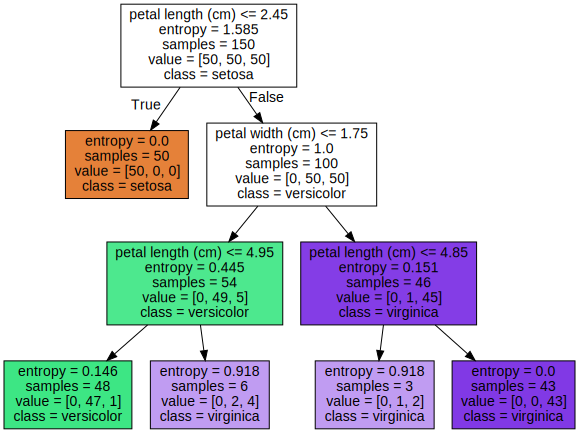

In [9]:
tree_clf_iris_2 = DecisionTreeClassifier(random_state=4, criterion='entropy', max_depth=3) # decision tree model 생성. 최대 깊이는 3으로 제한
tree_clf_iris_2 = tree_clf_iris_2.fit(iris.data, iris.target) # model 학습

dot_data = export_graphviz(tree_clf_iris_2, filled=True, out_file=None,
                           feature_names = iris.feature_names,
                           class_names = iris.target_names, rounded=False)
graphviz.Source(dot_data)

- 노드에 서로 다른 값들이 존재할 때, 최소 몇 개의 샘플이 남아있을 때만 분기를 할지 지정.

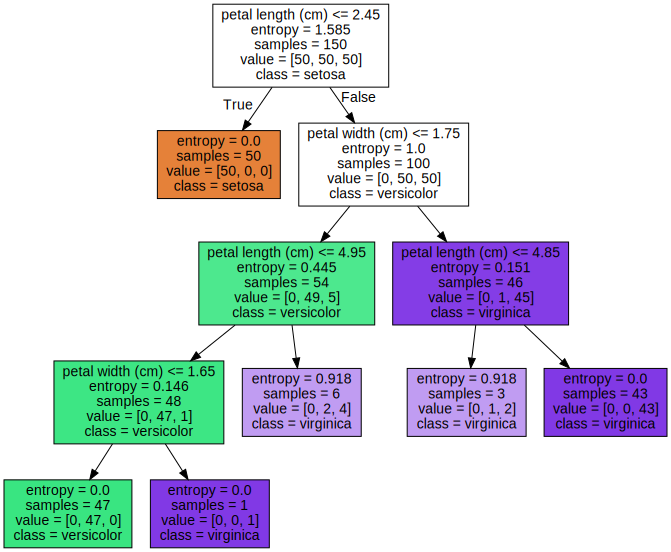

In [10]:
tree_clf_iris_3 = DecisionTreeClassifier(random_state=4, criterion='entropy', min_samples_split=10) # decision tree model 생성. 
tree_clf_iris_3 = tree_clf_iris_3.fit(iris.data, iris.target) # model 학습

dot_data = export_graphviz(tree_clf_iris_3, filled=True, out_file=None,
                           feature_names = iris.feature_names,
                           class_names = iris.target_names,
                           rounded=False)
graphviz.Source(dot_data)

In [11]:
# iris.data와 iris.target 에 대한 정확도를 계산해보자



<br>

# 4. Feature Importance

sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.6687
petal width (cm): 0.3313


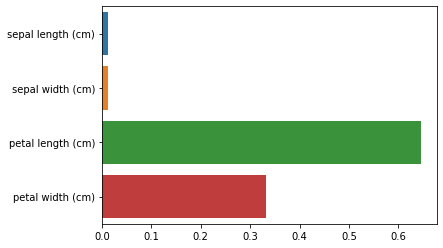

In [12]:
# feature 별 feature importance 매핑
for name, value in zip(iris.feature_names, tree_clf_iris_3.feature_importances_):
    print('{0}: {1:.4f}'.format(name, value))

# feature importance 시각화
fig = sns.barplot(x=tree_clf_iris.feature_importances_, y=iris.feature_names)
plt.show()

<br>

# 5. Decision Boundary

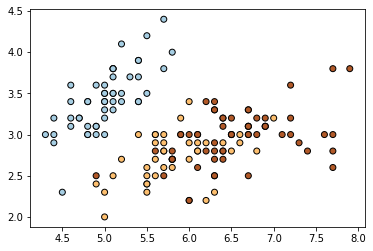

In [13]:
# iris dataset 사용
X = iris.data[:,:2] # iris dataset의 2개의 feature 사용. 
y = iris.target # iris dataset의 target label
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.show()

In [14]:
# split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [15]:
# visualization for dicision boundary

def decision_boundary(model, X, y):
    
    fig, ax = plt.subplots()
    
    # dataset
    ax.scatter(X[:,0], X[:,1], c=y, s=25, 
               cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()))
    ax.axis('tight')
    ax.axis('off')
    
    # x, y data limit
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(X, y)
        
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                         np.linspace(ylim_start, ylim_end, num=200))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha=0.3,
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap='rainbow')
    plt.show()
    
    

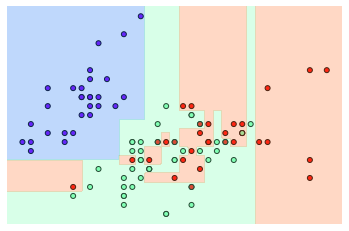

In [16]:
# 과적합 트리의 decision boundary 모습.
# 작게 구분된 경계영역이 많고 
decision_boundary(tree_clf, X_train, y_train)

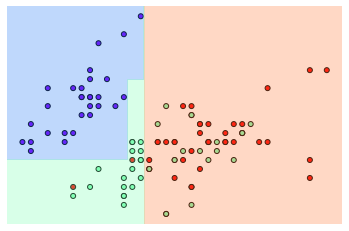

In [17]:
# 깊이 제한 = 3 
decision_boundary(tree_clf_iris_2, X_train, y_train)

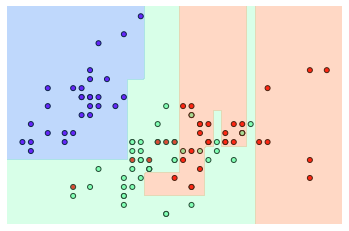

In [18]:
# 분기할 수 있는 최소 샘플 수 제한 = 10
decision_boundary(tree_clf_iris_3, X_train, y_train)

- 과적합을 줄이기 위한 튜닝: 두 파라미터 사용

1. depth=1 | tr_acc:0.600, ts_acc:0.733


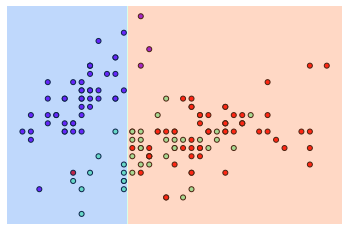

2. depth=3 | tr_acc:0.771, ts_acc:0.756


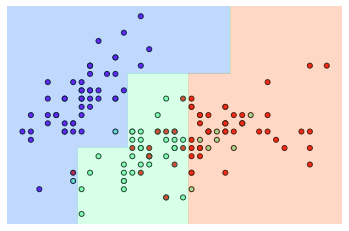

3. depth=5 | tr_acc:0.829, ts_acc:0.733


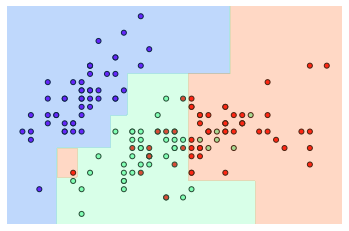

In [19]:
depths = [1, 3, 5]
for i, depth in enumerate(depths):
    # decision tree model + training
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=4)
    clf.fit(X_train, y_train)
    
    # accuracy
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)  
    
    print(f"{i+1}. depth={depth} | tr_acc:{metrics.accuracy_score(y_train, y_train_pred):.3f}, ts_acc:{metrics.accuracy_score(y_test, y_test_pred):.3f}")

    decision_boundary(clf, X, y)


1. min sample=3 | tr_acc:0.895, ts_acc:0.800


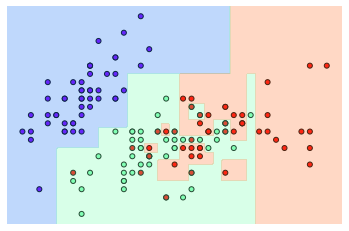

2. min sample=5 | tr_acc:0.876, ts_acc:0.800


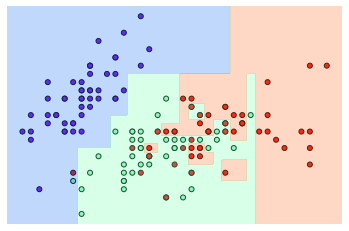

3. min sample=7 | tr_acc:0.867, ts_acc:0.800


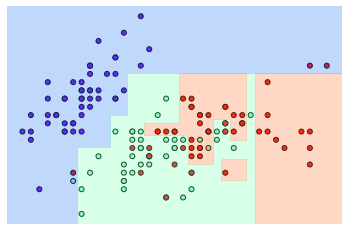

4. min sample=20 | tr_acc:0.819, ts_acc:0.711


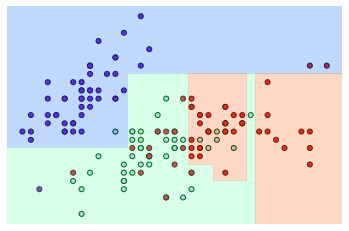

5. min sample=50 | tr_acc:0.686, ts_acc:0.711


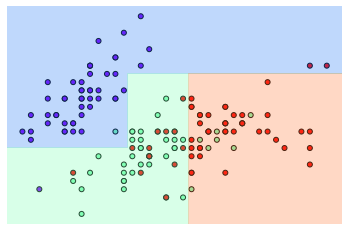

In [20]:
samples_n = [3, 5, 7, 20, 50]

for i, sample_n in enumerate(samples_n):
    # decision tree model + training
    clf = DecisionTreeClassifier(criterion='entropy', random_state=4, min_samples_split=sample_n)
    clf.fit(X_train, y_train)
    
    # accuracy
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)  
    
    print(f"{i+1}. min sample={sample_n} | tr_acc:{metrics.accuracy_score(y_train, y_train_pred):.3f}, ts_acc:{metrics.accuracy_score(y_test, y_test_pred):.3f}")

    decision_boundary(clf, X, y)